In [1]:
import os 

os.getcwd()

'/home/ykw6644/RTAinCFS/cfs-wcrt-simulator/script/analysis'

In [2]:
# For Table 5 in the paper.
import pandas as pd

# analyze the exp with non_rt_task
result_dir = "../../real_linux_application/exp_results_non_RT"
schedulers = ["CFS", "FIFO", "RR"]

# set task_info in dataset
result_path = result_dir + "/" + schedulers[-1] + "_result.json"
results_df = pd.read_json(result_path)
results_df = results_df[["task_name", "deadline_ns", "wcet_ns", "priority"]]

for scheduler in schedulers:
    result_path = result_dir + "/" + scheduler + "_result.json"
    result_df = pd.read_json(result_path)
    result_df = result_df[["task_name", "wcrt_ns"]]
    result_df.columns = ["task_name", scheduler + "_wcrt_ns"]
    results_df = pd.merge(results_df, result_df, on="task_name")

# convert to ms
results_df["deadline_ms"] = results_df["deadline_ns"] / 1000000
results_df["wcet_ms"] = results_df["wcet_ns"] / 1000000
results_df["CFS_wcrt_ms"] = results_df["CFS_wcrt_ns"] / 1000000
results_df["FIFO_wcrt_ms"] = results_df["FIFO_wcrt_ns"] / 1000000
results_df["RR_wcrt_ms"] = results_df["RR_wcrt_ns"] / 1000000

# round to 2 decimal places
results_df = results_df.round(1)

# drop ns columns
results_df = results_df.drop(["deadline_ns", "wcet_ns", "CFS_wcrt_ns", "FIFO_wcrt_ns", "RR_wcrt_ns"], axis=1)
results_df

,task_name,priority,deadline_ms,wcet_ms,CFS_wcrt_ms,FIFO_wcrt_ms,RR_wcrt_ms
0,task1,78,100.0,2.8,15.3,4.8,6.3
1,task2,50,1000.0,423.0,912.7,757.4,757.4
2,task3,89,50.0,1.8,14.8,1.9,1.9
3,task4,55,500.0,69.2,167.8,116.4,116.4
4,task5,78,100.0,1.5,12.4,6.3,6.3
5,task6,68,200.0,32.7,48.2,39.1,39.1
6,Non_RT_Task,0,400.0,36.0,192.5,600.3,600.4


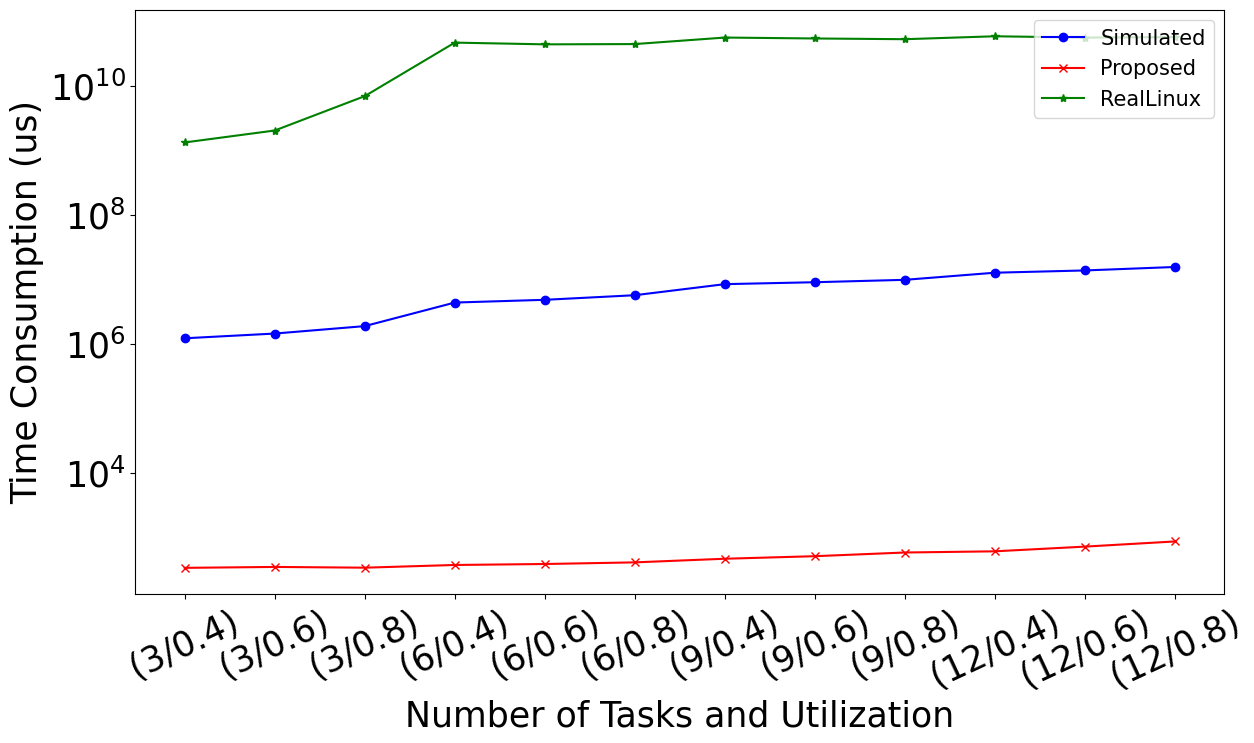

In [6]:
# For Figure 6

import pandas as pd
import matplotlib.pyplot as plt

# load data from 
file_path = "../../real_linux_application/exp_results_CFS/time_analysis2.xlsx"
time_df = pd.read_excel(file_path)

time_df = time_df[2:]
time_df.columns = time_df.iloc[0]
time_df = time_df[1:]

time_df = time_df.drop(["schedule_count", "simulated time"], axis=1)

grouped = time_df.groupby(["numTasks", "utilization"]).mean().reset_index()
grouped["simulator_timeConsumption(us)"] = grouped["simulator_timeConsumption(us)"].astype(int)
grouped["proposed_timeConsumption(us)"] = grouped["proposed_timeConsumption(us)"].astype(int)
grouped["realLinux_timeConsumption(us)"] = grouped["realLinux_timeConsumption(us)"].astype(int)


labels = []
simulated = []
proposed = []
realLinux = []

# set f"({data.numTasks}, {data.utilization}) from grouped into labels
for index, data in grouped.iterrows():
    labels.append(f"({data.numTasks}/{data.utilization})")
    simulated.append(data["simulator_timeConsumption(us)"])
    proposed.append(data["proposed_timeConsumption(us)"])
    realLinux.append(data["realLinux_timeConsumption(us)"])


fontsize = 25
tick_rotation = 25
# Create the box plot
plt.figure(figsize=(12, 7))

plt.yscale("log")
# draw plot for simulated and labels
plt.plot(labels, simulated, marker='o', linestyle='-', color='b', label='Simulated')
plt.plot(labels, proposed, marker='x', linestyle='-', color='r', label='Proposed')
plt.plot(labels, realLinux, marker='*', linestyle='-', color='g', label='RealLinux')
plt.xticks(rotation=tick_rotation)
plt.xlabel('Number of Tasks and Utilization', fontsize=fontsize)
plt.ylabel('Time Consumption (us)', fontsize=fontsize)
# plt.title(title, fontsize=fontsize)
plt.tight_layout()

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(loc='upper right', fontsize=fontsize-10)

# Display the plot
plt.show()

    
